In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = "C:\\Users\\Dhruv\\Machine-Learning\\code\\files\\project_files\\Datathon.csv"

In [4]:
data = pd.read_csv(path)

In [5]:
data.head()


,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,99.0,100.0,87.0
1,male,group B,associate's degree,standard,completed,96.0,118.0,119.0
2,male,group D,high school,standard,none,117.0,115.0,106.0
3,male,group C,master's degree,free/reduced,completed,74.0,85.0,57.0
4,male,group C,high school,standard,none,103.0,106.0,47.0


In [6]:
data.describe()


,math score,reading score,writing score
count,997.000000,997.000000,998.000000
mean,91.196590,94.671013,80.234469
std,17.441626,17.286683,16.621129
min,20.000000,20.000000,22.000000
25%,81.000000,86.000000,70.000000
50%,93.000000,97.000000,82.000000
75%,103.000000,107.000000,92.000000
max,120.000000,120.000000,119.000000


In [7]:
print(f"Math scores > 100 =  {(data['math score'] > 100).sum()}")
print(f"Reading scores > 100  =  {(data['reading score'] > 100).sum()}")
print(f"Writing scores > 100  =  {(data['writing score'] > 100).sum()}")

Math scores > 100 =  313
Reading scores > 100  =  414
Writing scores > 100  =  101


### Since we have quite a few values over 100, we consider 120 as the maximum marks that can be obtained

In [8]:
data['percentage'] = (data['math score'] + data['reading score'] + data['writing score']) * 100/ 360

In [9]:
data.head()

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage
0,female,group B,bachelor's degree,standard,none,99.0,100.0,87.0,79.444444
1,male,group B,associate's degree,standard,completed,96.0,118.0,119.0,92.500000
2,male,group D,high school,standard,none,117.0,115.0,106.0,93.888889
3,male,group C,master's degree,free/reduced,completed,74.0,85.0,57.0,60.000000
4,male,group C,high school,standard,none,103.0,106.0,47.0,71.111111


In [10]:
data.describe()


,math score,reading score,writing score,percentage
count,997.000000,997.000000,998.000000,993.000000
mean,91.196590,94.671013,80.234469,73.858677
std,17.441626,17.286683,16.621129,11.737073
min,20.000000,20.000000,22.000000,34.166667
25%,81.000000,86.000000,70.000000,65.555556
50%,93.000000,97.000000,82.000000,74.722222
75%,103.000000,107.000000,92.000000,82.222222
max,120.000000,120.000000,119.000000,98.055556


In [11]:
data.isnull().sum()

gender                         0
race                           0
parental level of education    6
lunch                          0
test preparation course        0
math score                     3
reading score                  3
writing score                  2
percentage                     7
dtype: int64

In [12]:
data['math score'].fillna(data['math score'].mean(), inplace=True)
data['reading score'].fillna(data['reading score'].mean(), inplace=True)
data['writing score'].fillna(data['writing score'].mean(), inplace=True)
data['percentage'].fillna(data['percentage'].mean(), inplace=True)



In [13]:
data.isnull().sum()


gender                         0
race                           0
parental level of education    6
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
percentage                     0
dtype: int64

### Dropping catagorical values

In [14]:
data.dropna(inplace=True)

In [15]:
data.isnull().sum()

gender                         0
race                           0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
percentage                     0
dtype: int64

<AxesSubplot:title={'center':'Countplot of reading scores:'}, xlabel='count', ylabel='reading score'>

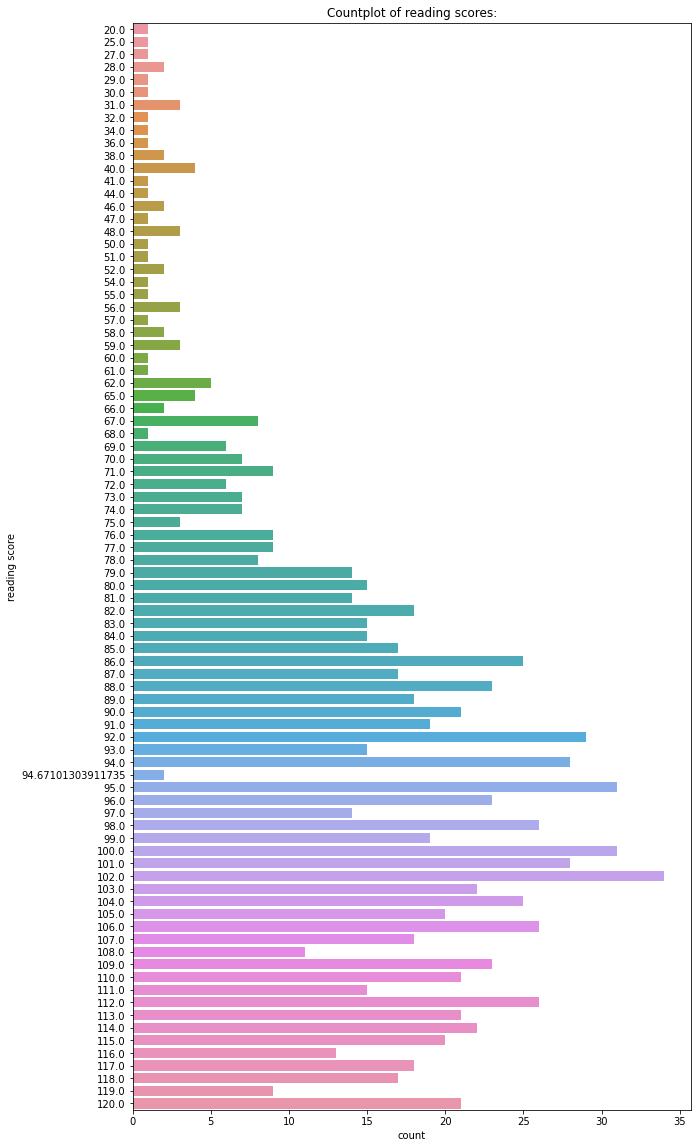

In [16]:
plt.figure(figsize=(10,20))
sns.countplot(y=data['reading score'])
plt.title("Countplot of reading scores:")
sns.countplot(y=data['reading score'])

Text(0.5, 1.0, 'Reading score compared to gender')

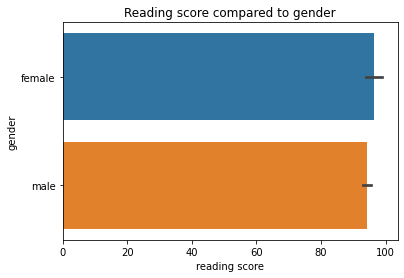

In [17]:
sns.barplot(x='reading score', y='gender', data=data)
plt.title('Reading score compared to gender')

Text(0.5, 1.0, 'Reading score compared race')

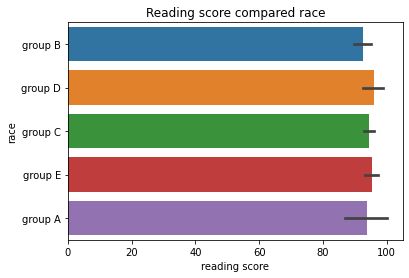

In [18]:
sns.barplot(x='reading score', y='race', data=data)
plt.title('Reading score compared race')


In [19]:
def grade(percentage):
    if percentage > 90 and percentage <= 100:
        return 'S'
    elif percentage >= 80 and percentage < 90:
        return 'A'
    elif percentage >= 70 and percentage < 80:
        return 'B'
    elif percentage >= 60 and percentage < 70:
        return 'C'
    elif percentage >= 40 and percentage < 60:
        return 'D'
    else:
        return 'F'

In [20]:
data['grade'] = data['percentage'].apply(grade)

In [21]:
data.head()

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,grade
0,female,group B,bachelor's degree,standard,none,99.0,100.0,87.0,79.444444,B
1,male,group B,associate's degree,standard,completed,96.0,118.0,119.0,92.500000,S
2,male,group D,high school,standard,none,117.0,115.0,106.0,93.888889,S
3,male,group C,master's degree,free/reduced,completed,74.0,85.0,57.0,60.000000,C
4,male,group C,high school,standard,none,103.0,106.0,47.0,71.111111,B


In [22]:
data['grade']

0      B
1      S
2      S
3      C
4      B
      ..
995    S
996    C
997    B
998    B
999    A
Name: grade, Length: 994, dtype: object

Text(0.5, 1.0, 'Distribuition of percentage and parental education, split by gender')

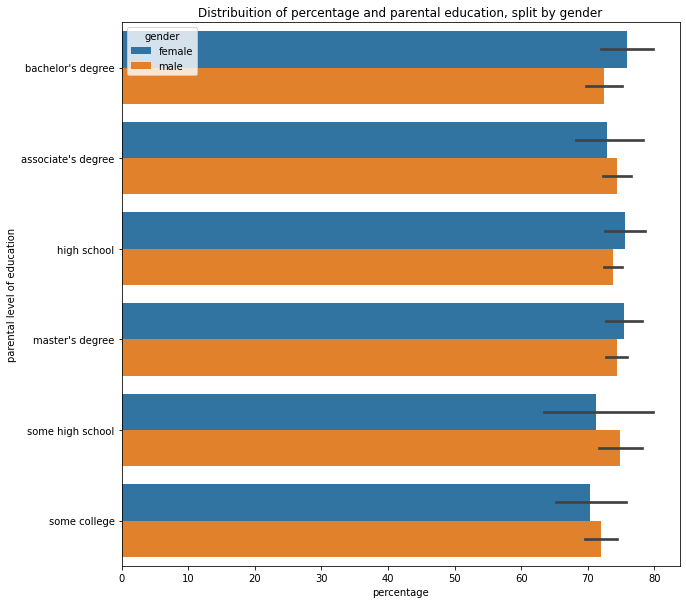

In [23]:
plt.figure(figsize=(10,10))
sns.barplot(x='percentage', y='parental level of education', hue='gender', data= data)
plt.title("Distribuition of percentage and parental education, split by gender")

# TASK

In [24]:
randomSample100 = data.sample(100)

In [25]:
randomSample100

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,grade
951,male,group C,high school,free/reduced,none,102.0,105.0,96.0,84.166667,A
733,male,group C,high school,standard,none,82.0,75.0,57.0,59.444444,D
207,male,group C,associate's degree,standard,none,108.0,94.0,89.0,80.833333,A
514,male,group C,high school,free/reduced,none,104.0,117.0,107.0,91.111111,S
291,male,group B,associate's degree,standard,none,85.0,101.0,83.0,74.722222,B
...,...,...,...,...,...,...,...,...,...,...
618,female,group C,master's degree,standard,completed,115.0,109.0,97.0,89.166667,A
700,male,group C,some college,standard,completed,106.0,109.0,95.0,86.111111,A
88,female,group B,some college,standard,none,85.0,98.0,80.0,73.055556,B
516,male,group B,high school,free/reduced,none,101.0,117.0,97.0,87.500000,A


In [26]:
stratifyRace100 = data.groupby('race', group_keys=False).apply(lambda x: x.sample(20))

In [27]:
stratifyRace100

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,grade
694,male,group A,associate's degree,standard,none,76.0,91.0,69.0,65.555556,C
780,male,group A,high school,standard,none,73.0,41.0,70.0,51.111111,D
505,male,group A,high school,free/reduced,none,109.0,110.0,93.0,86.666667,A
675,male,group A,master's degree,standard,none,77.0,92.0,79.0,68.888889,C
357,male,group A,some college,standard,none,69.0,94.0,36.0,55.277778,D
...,...,...,...,...,...,...,...,...,...,...
984,male,group E,master's degree,standard,completed,101.0,103.0,95.0,83.055556,A
483,male,group E,master's degree,standard,none,86.0,80.0,59.0,62.500000,C
342,male,group E,master's degree,standard,none,96.0,104.0,87.0,79.722222,B
834,male,group E,master's degree,standard,none,85.0,78.0,58.0,61.388889,C


In [28]:
randomSample100['math score'].mean()

93.44

In [29]:
stratifyRace100['math score'].mean()

90.19

<AxesSubplot:xlabel='race', ylabel='count'>

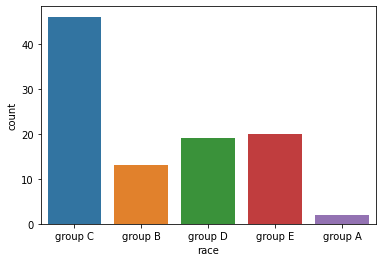

In [30]:
sns.countplot(x=randomSample100['race'])

<AxesSubplot:xlabel='race', ylabel='count'>

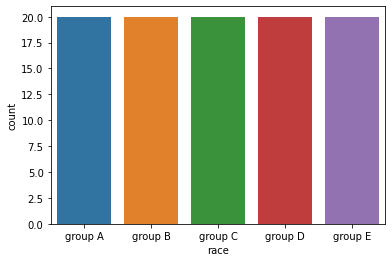

In [31]:
sns.countplot(x=stratifyRace100['race'])


Text(0.5, 1.0, 'Math score vs race')

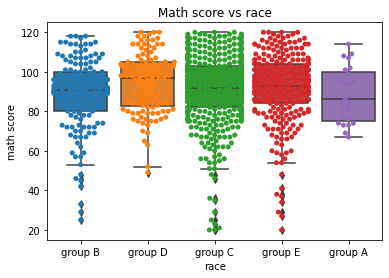

In [32]:
sns.swarmplot(y='math score', x='race', data=data)
sns.boxplot(y='math score', x='race', data=data)
plt.title('Math score vs race')

Text(0.5, 1.0, 'Writing score vs race')

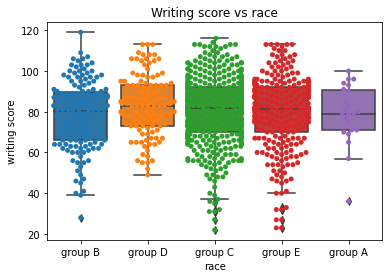

In [33]:
sns.swarmplot(y='writing score', x='race', data=data)
sns.boxplot(y='writing score', x='race', data=data)
plt.title('Writing score vs race')


Text(0.5, 1.0, 'Reading score vs race')

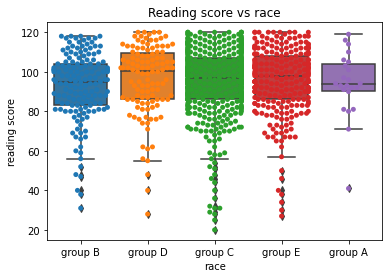

In [34]:
sns.swarmplot(y='reading score', x='race', data=data)
sns.boxplot(y='reading score', x='race', data=data)
plt.title('Reading score vs race')